<b><font size="4">Daniel Leal</font></b><br> 
*Assessing ML4T Learners*<br>
*Stock Trader Bot*<br><br>


### Assess Learners

<b>Description:</b> In Tucker Balch's ML4T university course, he instructs his students to test their learners and compare each learners performance on the Istanbul.csv dataset. For more information, refer to the template section located in this [link](https://quantsoftware.gatech.edu/Spring_2020_Project_3:_Assess_Learners#Implement_DTLearner_.2815_points.29).

<b>Recommendation:</b>
The dataset for [Istanbul.csv](https://raw.githubusercontent.com/dannyleall/StockMarketTraderBot/main/Data/Istanbul.csv) 
is recommended to be done by downloading the file and including it in the repo folder we are working on.

<b>Istanbul.csv:</b> "This dataset includes the returns of multiple worldwide indexes for a number of days in history. The overall objective is to predict what the return for the MSCI Emerging Markets (EM) index will be on the basis of the other index returns. Y in this case is the last column to the right, and the X values are the remaining columns to the left (except the first column which is the date)." <br><br>

<br><br><br><br><br>
### Utility functions for Assessing Learners
<b>ProcessData(file, trainSize=0.6):</b><br>Preprocesses data and splits into training and testing, per Tucler Balch's university coursework guidelines. We will allocate 60% to training, 40% to testing, remove all unused values within the dataframe, and then return the training and testing data for the Y and X axis.<br><br>

<b>VisualizeResults(inSample, outSample, axisMaxValue,<br>
&emsp;&emsp;                          xLabel="Leaf Sizes", yLabel="RMSE",  title="RMSEs for Learner"):</b><br>
This function simply prints out the root mean squared error and correlations graphs across a variety of leaf sizes and bag sizes for readers to visualize the differences between the in-sample and out-sample.

In [1]:
# Splits test learners data into training and testing set.
def ProcessData(file, trainSize=0.6):
    """
    Description: This function serves to read a .csv file and prepare
    the data for training and testing by splitting it for us.
    Params: 
        trainSize (float): Training size split.
    Returns: Data for Train and Test for X and Y.
    """

    data = np.genfromtxt(file, delimiter=",")
    data = data[1:, 1:]

    # Compute training and testing data.
    trainRows = int(trainSize * data.shape[0])
    testRows = data.shape[0] - trainRows

    xTrain = data[:trainRows, 0:-1]
    yTrain = data[:trainRows, -1]
    xTest = data[trainRows:, 0:-1]
    yTest = data[trainRows:, -1]

    return xTrain, yTrain, xTest, yTest

In [2]:
# Plots and visualizes learner results.
def Visualize(inSample, outSample, axisMaxValue,
              xLabel="Leaf Size", yLabel="RMSE", title="RMSEs for Learner"):

    """
    Description: This function serves to plot the RMSE results of training
    and testing a learner.
    Params:
        inSample (list): Training data stats.
        outSample (list): Testing data stats.
        xAxisLen (int): Length of X Axis.
        xLabel(str): X Label.
        yLabel(str): Y Label.
        title (str): Title of plot.
    Returns: A plot visualizing the results.
    """
    # Visualize the RMSEs.
    plt.plot(inSample, label="In-Sample", linewidth=2.0)
    plt.plot(outSample, label="Out-Sample", linewidth=2.0)
    plt.title(title)
    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.legend(loc='best')
    plt.show()
    

<br><br><br><br>
### Table of Contents
&emsp; 1) Train and Evaluate Decision Tree Learner

&emsp; 2) Train and Evaluate Random Forest Learner

&emsp; 3) Train and Evaluate Bootstrap Aggregating Learner

&emsp; 4) Train and Evaluate Strategy Dyna-Q Learner (Using a stock, not `Istanbul.csv`)

&emsp; 5) Train and Evaluate Deep-Q Neural Network Learner (Using a stock, not `Istanbul.csv`)

&emsp; 6) Clean Output Using Dyna-Q and Deep-Q for Stock Order Recommendation (Using a stock, not `Istanbul.csv`).

<br>

In [3]:
# Import dependencies.
import numpy as np
import matplotlib.pyplot as plt
from Utilities import *
from termcolor import colored, cprint
import time
from Learners import RandomTreeLearner as RTL

# Filter out warning messages from jupyter notebook.
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read a file and split into training and testing (60-40).
trainX, trainY, testX, testY = ProcessData("Data/Istanbul.csv", trainSize=0.6)

<br><br>
# Training and Evaluating Learners
<br>

### Description:
Here we will now train and test our learners on various leaf sizes across numerous iterations. Basically, for every leaf number (maxLeafSize=200), we will perform a certain amount of iterations (iterations=20) where we will train our model on a given data point using the function AddEvidence. Once we have trained it using the entire training data separated for it, we then call the Query function to use our model to predict its prices based on a given testing dataset. Furthermore, we store our predictions in a variable called predY and we compare the prediction from our Query function to the actual point from that date. We do this in order to calculate the root mean squared error to effectively perform an analysis on our learner's performance. After, we will compare the Root Mean Squared Errors (RMSEs) between the training set and test set in order to locate any type of overfitting and underfitting amongst our models. 
<br>

### Process:
For leaf sizes ranging from 0 to maxLeafSize, we do the following: 

1) Split the data into training and testing using a 60-40 split.

2) Train the model using the AddEvidence function.  

3) Test the models predicitions using the Query function. 

4) Compare the prediction to the actual testing point using root mean squared errors and correlations function to measure our predictions behavior to the actual behavior that the testing data consisted of. 

5) The RMSEs and correlations of the learners for a given leaf size is then plotted on a graph to demonstrate the performance of our model based on the averages of every leaf size. 

6) Visualize the results by plotting the RMSEs of the predictions vs. the actual testing data on the Y-Axis along with the leaf size on the X-Axis. 

7) Visualize more results by plotting the correlations values of the predictions vs. the actual testing data on the Y-Axis along with the leaf size on the X-Axis.

8) Analyze the results of our model and identify best performing leaf sizes for each model as well as trends with respect to over and underfitting.
<br><br><br>

<br><br><br>
### 1) Train and Evaluate Decision Tree Learner

<b>Brief Description:</b> We will now train and test our DecisionTreeLearner on various leaf sizes. A decision tree is helpful in stock predictions because it allows you to evaluate your options. Decision trees in general are excellent tools for helping choose between several courses of action. In this case, our AddEvidence function calls our recursive BuildTree function that serves to select the best feature when given a training data set. This selection of a best feature is important because it allows for a more organized construction of a decision tree to be used when predicitng a stock price. When it comes to the prediction, the decision tree model will call the Query function that will traverse through the decision tree and select what it believes to be the most accurate prediction based on the tree constructed on the best features of the training data. After, we will compare the Root Mean Squared Errors (RMSEs) between the training set and test set in order to locate any type of overfitting amongst our models. 

Timing Computation
This Decision Tree Learner took 7.44 seconds to compute.



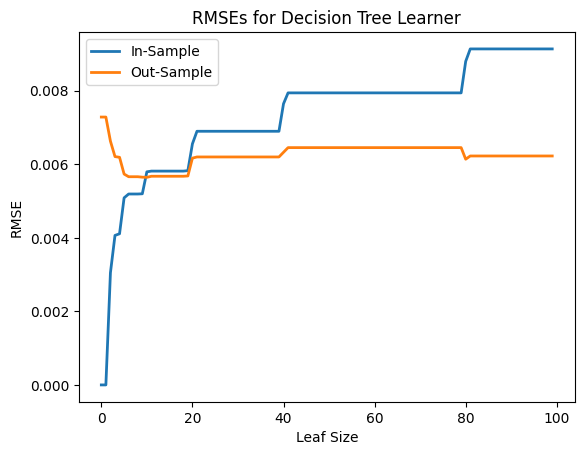

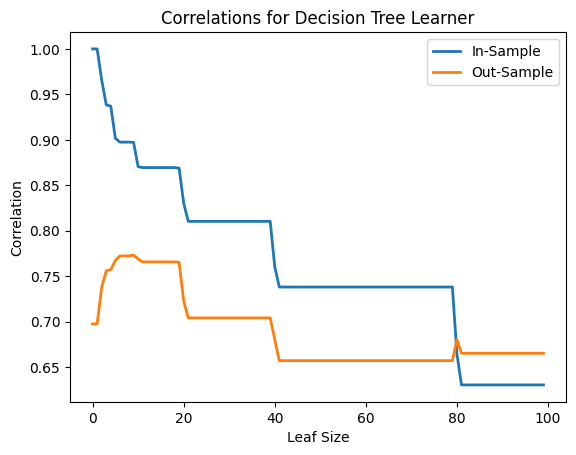

In [5]:
from Learners import DecisionTreeLearner as DTL
import math

def DTLearnerTest(): 
    # Start timer.
    st = time.time()
    
    # Initialize RMSEs, correlations, and leafSize.
    rmseIn = []
    rmseOut = []
    corrIn = []
    corrOut = []
    leafSize = 100
    
    # Loop for leafSizes up to 100.
    for idx in range (0, leafSize):
        
        # Create learner instance.
        dtl = DTL(leafSize=idx, verbose=False)
        
        # Train dtl.
        dtl.AddEvidence(trainX, trainY)
        
        # Test using Query on trainX for in-sample and testX for out-sample.
        inPredY = dtl.Query(trainX)
        outPredY = dtl.Query(testX)
        
        # Compute the RMSE and correlations for both the in and out samples.
        inRmseValue = math.sqrt(
            ((trainY - inPredY) ** 2).sum() / trainY.shape[0])
        outRmseValue = math.sqrt(
            ((testY - outPredY) ** 2).sum() / testY.shape[0])
        inCorrValue = np.corrcoef(inPredY, y=trainY)
        outCorrValue = np.corrcoef(outPredY, y=testY)
        
        # Append RMSEs and correlations to respective arrays.
        rmseIn.append(inRmseValue)
        rmseOut.append(outRmseValue)
        corrIn.append(inCorrValue[0, 1])
        corrOut.append(outCorrValue[0, 1])
    
    # End timer and calculte elapsed time.
    et = time.time()
    elapsed = round((et - st), 2)
    
    # Print computing time.
    cprint("Timing Computation", attrs=["bold", "underline"])
    print("This Decision Tree Learner took {} seconds to compute.\n".format(elapsed))
    
    # Visualize the results.
    Visualize(inSample=rmseIn,
              outSample=rmseOut,
              axisMaxValue=leafSize,
              title="RMSEs for Decision Tree Learner")
    Visualize(inSample=corrIn,
              outSample=corrOut,
              axisMaxValue=leafSize,
              yLabel="Correlation",
              title="Correlations for Decision Tree Learner")
    
if __name__ == '__main__':
    DTLearnerTest()

<br><br><br>
### 2) Train and Evaluate Random Tree Learner

<b>Brief Description:</b> We will now train and test our RandomTreeLearner on various leaf sizes. A random tree follows practically the same process as a decision tree. However, the difference with this learner is that it does not select the best feature unlike a Decision Tree Learner. In this case, as the name implies, it selects a random feature to base its tree construction. Furthermore, random trees utilizes sort of a bagging method to combine multiple random decision trees. This is really good for predictions because simply put, random trees merges the decision trees together to get a more accurate and stable prediction. This model follows the same funciton calling as the DecisionTreeLearner, the only difference is that within the BuildTree, the Random forest adds additional randomness to the model while growing the trees. This means that instead of searching for the most important feature when splitting a node, it will for the best feature amongst a random subset of features!

Timing Computation
This Random Tree Learner took 0.72 seconds to compute.



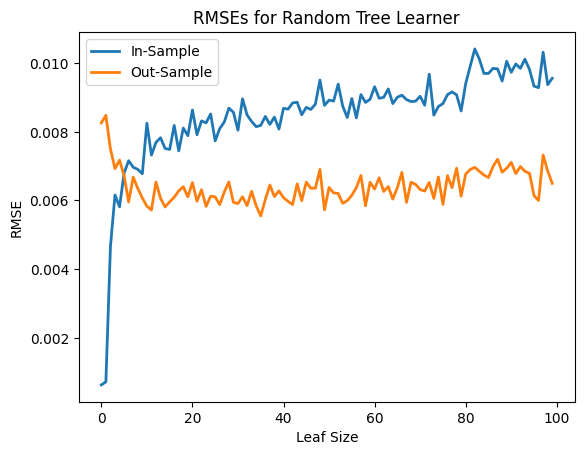

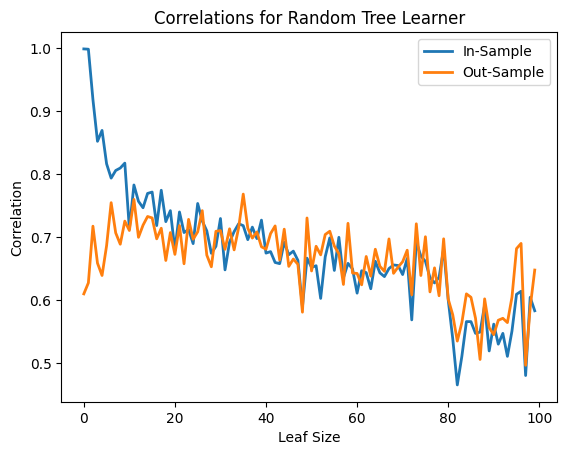

In [6]:
from Learners import RandomTreeLearner as RTL
import math

def RTLearnerTest(): 
    # Start timer.
    st = time.time()
    
    # Initialize RMSEs, correlations, and leafSize.
    rmseIn = []
    rmseOut = []
    corrIn = []
    corrOut = []
    leafSize = 100
    
    # Loop for leafSizes up to 100.
    for idx in range (0, leafSize):
        
        # Create learner instance.
        rtl = RTL(leafSize=idx, verbose=False)
        
        # Train dtl.
        rtl.AddEvidence(trainX, trainY)
        
        # Test using Query on trainX for in-sample and testX for out-sample.
        inPredY = rtl.Query(trainX)
        outPredY = rtl.Query(testX)
        
        # Compute the RMSE and correlations for both the in and out samples.
        inRmseValue = math.sqrt(
            ((trainY - inPredY) ** 2).sum() / trainY.shape[0])
        outRmseValue = math.sqrt(
            ((testY - outPredY) ** 2).sum() / testY.shape[0])
        inCorrValue = np.corrcoef(inPredY, y=trainY)
        outCorrValue = np.corrcoef(outPredY, y=testY)
        
        # Append RMSEs and correlations to respective arrays.
        rmseIn.append(inRmseValue)
        rmseOut.append(outRmseValue)
        corrIn.append(inCorrValue[0, 1])
        corrOut.append(outCorrValue[0, 1])
    
    # End timer and calculte elapsed time.
    et = time.time()
    elapsed = round((et - st), 2)
    
    # Print computing time.
    cprint("Timing Computation", attrs=["bold", "underline"])
    print("This Random Tree Learner took {} seconds to compute.\n".format(elapsed))
    
    # Visualize the results.
    Visualize(inSample=rmseIn,
              outSample=rmseOut,
              axisMaxValue=leafSize,
              title="RMSEs for Random Tree Learner")
    Visualize(inSample=corrIn,
              outSample=corrOut,
              axisMaxValue=leafSize,
              yLabel="Correlation",
              title="Correlations for Random Tree Learner")
    
if __name__ == '__main__':
    RTLearnerTest()

<br><br><br>
### 3) Train and Evaluate Boostrap Aggregating Learner

<b>Brief Description:</b> We will now train and test our BootStrapAggregatingLearner across varying leaf sizes. This algorithm will surely take a significantly large amount of time in computing. We can make this conclusion because the Bootstrap aggregating algorithm basically serves to perform a bagging technique on a given algorithm. The bootstrap aggregating learner intakes another learner such as a DecisionTree, RandomTree, LinReg, etc. From this algorithm, it will compute this algorithm over a number 'bag' times, in this case it is our maxBagSize value. From this, it will compute the average of all of the algorithms averages. This is very useful for predicitons because it significantly decreases overfitting because it reduces variance amongst the Query data points and aims to improve the overall stablities of our predicitons.<br>

Timing Computation
This Boostrap Aggregating Learner with a DTL and 50 bags took 334.21 seconds to compute.



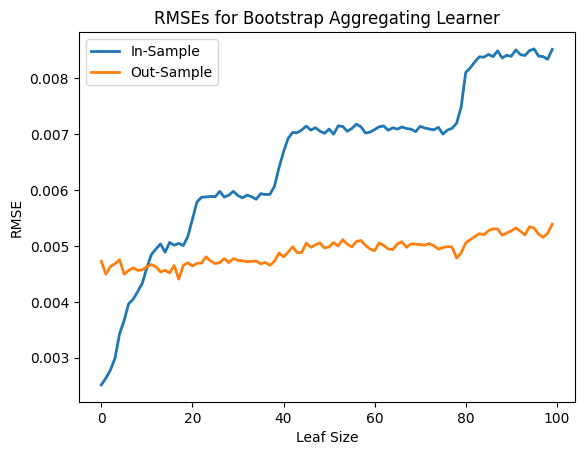

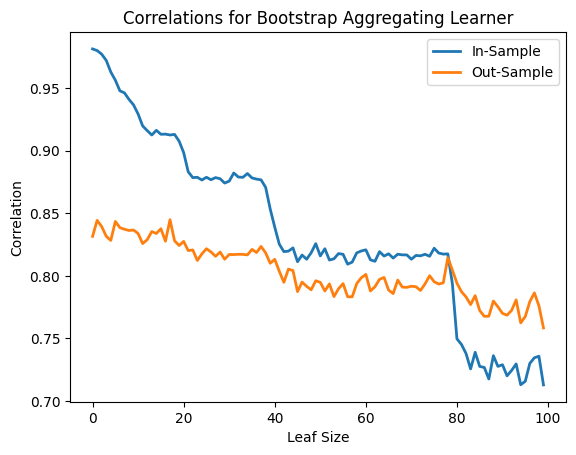

In [7]:
from Learners import BootstrapAggregatingLearner as BAL
import math

def BagLearnerTest():
    maxBagSize=50
    
    # Start timer.
    st = time.time()
    
    # Initialize RMSEs, correlations, and leafSize.
    rmseIn = []
    rmseOut = []
    corrIn = []
    corrOut = []
    leafSize = 100
    
    # Loop for leafSizes up to 100.
    for idx in range (0, leafSize):
        
        # Create learner instance.
        bal = BAL(bags=maxBagSize,
                  learner=DTL,
                  leafSize=idx,
                  verbose=False)
        
        # Train dtl.
        bal.AddEvidence(trainX, trainY)
        
        # Test using Query on trainX for in-sample and testX for out-sample.
        inPredY = bal.Query(trainX)
        outPredY = bal.Query(testX)
        
        # Compute the RMSE and correlations for both the in and out samples.
        inRmseValue = math.sqrt(
            ((trainY - inPredY) ** 2).sum() / trainY.shape[0])
        outRmseValue = math.sqrt(
            ((testY - outPredY) ** 2).sum() / testY.shape[0])
        inCorrValue = np.corrcoef(inPredY, y=trainY)
        outCorrValue = np.corrcoef(outPredY, y=testY)
        
        # Append RMSEs and correlations to respective arrays.
        rmseIn.append(inRmseValue)
        rmseOut.append(outRmseValue)
        corrIn.append(inCorrValue[0, 1])
        corrOut.append(outCorrValue[0, 1])
    
    # End timer and calculte elapsed time.
    et = time.time()
    elapsed = round((et - st), 2)
    
    # Print computing time.
    cprint("Timing Computation", attrs=["bold", "underline"])
    print("This Boostrap Aggregating Learner with a DTL and 50 bags took {} seconds to compute.\n".format(elapsed))
    
    # Visualize the results.
    Visualize(inSample=rmseIn,
              outSample=rmseOut,
              axisMaxValue=leafSize,
              title="RMSEs for Bootstrap Aggregating Learner")
    Visualize(inSample=corrIn,
              outSample=corrOut,
              axisMaxValue=leafSize,
              yLabel="Correlation",
              title="Correlations for Bootstrap Aggregating Learner")
    
if __name__ == "__main__":
    BagLearnerTest()

<br><br><br>
### 4) Train and Evaluate Strategy Q Learner

<b>Brief Description:</b> We will now train and test our StrategyLearner that implements our QLearner. In this StrategyLearner, we utilize technical indicators Momentum, Standard Moving Average, and Bollinger Bands Width as the values to feed the QLearner. This algorithm uses the daily return as its reward and performs actions based off the behavior of the technical indicators. For more information regarding specifics of Q table computing and overall in-depths explanations for state and action representations, refer to the methods with QLearner class within Learners.py.<br>

In [8]:
from Learners import StrategyLearner
from Learners import QLearner

def StrategyLearnerTest():
        numOfShares = 1
        symbol = "AMZN"
        startVal = 1
        commission = 0.00
        impact = 0.00
        
        # TRAINING.
        trainStartDate = "2022-09-02"
        trainEndDate = datetime.today().strftime('%Y-%m-%d')
        
        dfBmTrades = StrategyLearner().CreateBmDfTrades(symbol,
                                      startDate=trainStartDate,
                                      endDate=trainEndDate,
                                      numOfShares=numOfShares)
        
        learner = QLearner(numOfStates=3000, numOfActions=3)
        stl = StrategyLearner(numOfShares=numOfShares, impact=impact,
                              commission=commission, verbose=False,
                              learner=learner)
        
        stl.AddEvidence(symbol=symbol, startVal=startVal,
                        startDate=trainStartDate, endDate=trainEndDate)
        
        dfTrades = stl.Query(symbol=symbol, startDate=trainStartDate,
                                endDate=trainEndDate)
        
        training = StrategyLearner().SymbolValueFromTrading(
            dfOrders=dfTrades,
            symbol=symbol,
            startVal=startVal,
            startDate=trainStartDate,
            endDate=trainEndDate,
            commision=commission,
            impact=impact)
        
        StrategyLearner().MarketSimulator(dfTrades, dfBmTrades,
                                          symbol=symbol,
                                          startDate=trainStartDate,
                                          endDate=trainEndDate,
                                          title="QLearner Testing",
                                          startVal=startVal,
                                          commission=commission,
                                          impact=impact,
                                          saveFigure=True,
                                          figName="Data/QLearnerVisual.png"
                                          )
        
if __name__ == "__main__":
    StrategyLearnerTest()

<br><br><br>
### 5) Train and Evaluate Deep Q Network Learner

<b>Brief Description:</b> We will now train and test our Deep Q Neural Network (DQN) Learner that combines our Dyna-QLearner with keras neural networks (NN) and its Sequential and Dense classes. These classes allow us to specify the shape and layers of our custom NN. Within our DQN agent, we create functions that remember the behavior of the stock within a given iteration of the Q table and stores them in a Deque collection. Deque (Doubly Ended Queue) in Python is implemented similarly to lists, but is preferred over a list in the cases where we need quicker append and pop operations from both the ends of a given memory container. From here, the NN store these memories to formulate a stronger accuracy when backtesting and future runtime predictions. We implement a learning rate of .001 because if the agent is fed too high of a rate, then the algorithm will perform better quicker, but will decrease in performance as time progresses. Therefore, .001 produces best results in our case. We also begin with an exploration rate of 1.0 which means the algorithm will begin with random actions to understand how its reward system works. Through each iteration, the exploration rate will decrease by a factor of 0.9 and apply its learning rate so that its predictions are not so randomized and based more on acquiring a higher reward. In our case, our reward is the daily return from a performed action.<br>

Elapsed Time - 411.5387427806854



            Trade      AMZN    Return  Portfolio Return  DQNLearner
Date                                                               
2022-06-17      0  1.000000  0.024696          0.000000    1.000000
2022-06-21      0  1.023159  0.023159          0.000000    1.000000
2022-06-22      0  1.025701  0.002484          0.000000    1.000000
2022-06-23      1  1.058558  0.032033          0.032033    1.032033
2022-06-24      0  1.096404  0.035752          0.000000    1.032033
...           ...       ...       ...               ...         ...
2022-11-29      1  0.870081 -0.016285         -0.016285    0.850811
2022-11-30      2  0.908868  0.044579          0.089158    0.926668
2022-12-01      0  0.899077 -0.010773         -0.000000    0.926668
2022-12-02      0  0.886180 -0.014346         -0.000000    0.926668
2022-12-02      0  0.886180 -0.014346         -0.000000    0.926668

[118 rows x 5 columns]


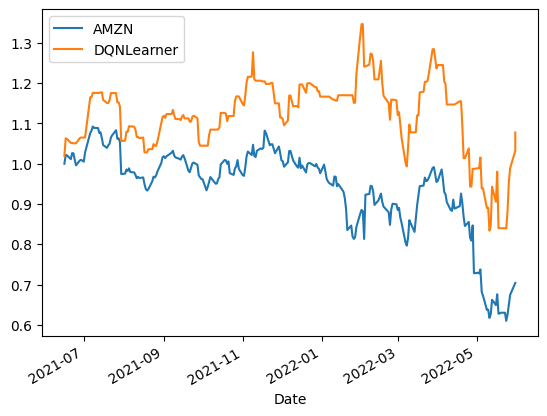

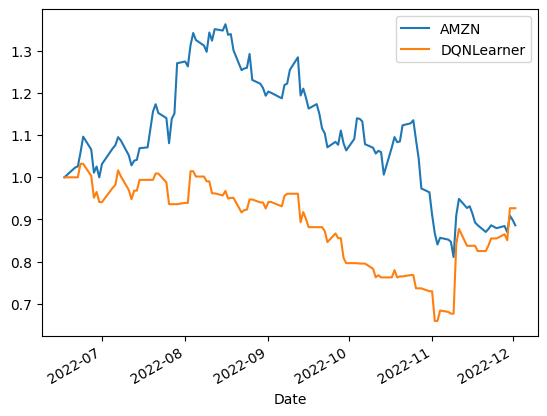

In [9]:
from Learners import DeepQNetwork
from Utilities import *
import time

# Filter out warning messages from jupyter notebook.
import warnings
warnings.filterwarnings('ignore')

def DQNLearnerTest():
    st = time.time()
    
    trainStart = "2021-06-01"
    trainEnd = "2022-06-01"
    
    testStart = "2022-06-02"
    testEnd = datetime.today().strftime('%Y-%m-%d')
    
    window = 10
    
    trainDf = IndividualHistoricalData(
              "AMZN", trainStart, trainEnd, 
              keepAllColumns="No")
    
    testDf = IndividualHistoricalData(
              "AMZN", testStart, testEnd, 
              keepAllColumns="No")
    
    dqn = DeepQNetwork(stateSize=10, actionSize=3, verbose=False)
    
    trainDf = dqn.TransformDf(trainDf)
    testDf = dqn.TransformDf(testDf)
    
    
    for epoch in range(20):
        dqn.memory = []
        dqn.AddEvidence(trainDf, trainEnd, dqn.memory)
        dqn.Query(testDf)
        
    dfTrades = dqn.CreateTradesDf(trainDf, dqn)
    
    et = time.time()
    
    elapsed = et - st
    print("Elapsed Time - {}\n\n\n".format(elapsed))
    
    dfTrades[["AMZN", "DQNLearner"]].plot()
    
    testTrades = dqn.CreateTradesDf(testDf, dqn)
    testTrades[["AMZN", "DQNLearner"]].plot()
    
    print(testTrades)
    
if __name__ == "__main__":
    DQNLearnerTest()

<br><br><br>
### 6) Output Recommendation

<b>Brief Description:</b> We will tie together all of the work done with the Strategy QLearner and Deep QLearner into a clean output that recommends the user what action to perform based on the algorithms predictions for the current day. For more information on the individual algorihtms, refer to either the `Learners.py` file or the description of their natural behaviors above.<br>

In [10]:
# Imports and Dependencies.
from termcolor import colored, cprint
from Learners import DeepQNetwork
from Learners import StrategyLearner
from Learners import QLearner
from Utilities import *
from datetime import timedelta
from simple_colors import *
import time
import sys

import warnings
warnings.filterwarnings('ignore')

def DqnOutput(symbol):
    """
    Description: This function will basically provide a order recommendation of hold/sell/buy based on a trained Deep Q
    Neural Network Learner. It will output what the order recommendation is based on what specific it believes is best.
    """
    
    # Print an organized message.
    print(magenta('\nDeep QLearner', ['italic', 'underlined', 'bold']))
    
    # Begin timing how long computing takes.
    startTimer = time.time()
    
    # Training time frame.
    trainStart = "2021-07-01"
    trainEnd = "2022-07-01"
    
    # Testing time frame.
    testStart = "2022-07-02"
    testEnd = datetime.today().strftime('%Y-%m-%d')
    
    # Create training df with historical data.
    trainDf = IndividualHistoricalData(
                    symbol,
                    trainStart,
                    trainEnd,
                    keepAllColumns="No")
    
    # Create testing df with historical data.
    testDf = IndividualHistoricalData(
                    symbol,
                    testStart,
                    testEnd,
                    keepAllColumns="No")
    
    # Create DQN instance.
    dqn = DeepQNetwork(
                    stateSize=10, # Amount of states within Q table.
                    actionSize=3, # Buy, sell, hold.
                    verbose=False) # Don't spit random messages.
    
    # Transform dfs into tradable dataframes.
    trainDf = dqn.TransformDf(trainDf)
    testDf = dqn.TransformDf(testDf)
    
    # Create a variety of epochs to train and test data.
    for epoch in range(20):
        dqn.memory = []
        dqn.AddEvidence(
                    trainDf, # Training dataframe.
                    trainEnd, # End training data.
                    dqn.memory)
        dqn.Query(testDf)
    
    # End timing for computing.
    endTimer = time.time()
    
    elapsed = round((endTimer - startTimer) / 60)
    
    # Create trades dataframe.
    testTrades = dqn.CreateTradesDf(
                    testDf,
                    dqn)
    
    # Create text from action for easier output.
    if (testTrades.iloc[-1]["Trade"] == 0):
        tradingDecision = colored("SELL", "red", attrs=["bold"])
    elif (testTrades.iloc[-1]["Trade"] == 1):
        tradingDecision = colored("HOLD", "blue", attrs=["bold"])
    elif (testTrades.iloc[-1]["Trade"] == 2):
          tradingDecision = colored("BUY", "green", attrs=["bold"])
          
    # Convert datetime to string.      
    dt = str(testTrades.index[-1])
    dt = dt.split(" ")[0]
        
    # Print computing time.
    cprint("Timing Computation", attrs=["bold", "underline"])
    print("This model took {} minutes to compute.".format(elapsed))
    
    cprint("Technical Indicators", attrs=["bold", "underline"])
    print("This model used the daily return of {} to perform its trades.".format(symbol))
    
    # Print out clean directions of recommended order.
    cprint("Trading Decision", attrs=["bold", "underline"])
    print("Based on the behavior of {} in the time range {} to {},"
          .format(symbol, trainStart, trainEnd))
    print("as well as the closing price on {}, our DQN says you should: {}"
          .format(dt, tradingDecision))


def DynaQOutput(symbol):
    """
    Description: This function will basically provide a order recommendation of hold/sell/buy based on a trained Dyna-Q
    Learner that trades based on momentum, standard moving average, and bollinder bandwidth. It will output what the 
    order recommendation is based on what specific computation.
    """

    # Print an organized message.
    print(magenta('\nStrategy QLearner', ['italic', 'underlined', 'bold']))
    
    # Begin timing how long computing takes.
    startTimer = time.time()
    
    # Training time frame.
    trainStart = "2021-07-01"
    trainEnd = "2022-07-01"
    
    # Testing time frame.
    testStart = "2022-07-02"
    testEnd = datetime.today().strftime('%Y-%m-%d')
    
    # Create benchmark df for trades.
    dfBmTrades = StrategyLearner().CreateBmDfTrades(
        symbol,
        startDate=trainStart,
        endDate=trainEnd,
        numOfShares=1)
    
    # Create dyna Q learner instance.
    learner = QLearner(
        numOfStates=3000, # Number of states in Q table.
        numOfActions=3) # Buy, sell, or hold.
    
    # Create a strategy Q trader.
    stl = StrategyLearner(
        numOfShares=1,
        impact=0.00,
        commission=0.00,
        verbose=False,
        learner=learner)
    
    # Train model.
    stl.AddEvidence(
        symbol=symbol,
        startVal=1,
        startDate=trainStart,
        endDate=trainEnd)
    
    # Create trading dataframe with suggestions.
    dfTrades = stl.Query(
        symbol=symbol,
        startDate=testStart,
        endDate=testEnd)
    
    # Grab end of data for comparison.
    data = IndividualHistoricalData(symbol, testStart, testEnd, "No")
    endOfData = data.index[-1]
    endOfDataAsString = str(endOfData)
    endOfDataAsString = endOfDataAsString.split(" ")[0]
    
    # Assign the last date of trade to a variable.
    lastTrade = dfTrades.index[-1]
    
    
    # Extract trading decision.
    if (lastTrade == endOfData):
        if (dfTrades.iloc[-1]["Shares"] == -1):
            tradingDecision = colored("SELL", "red", attrs=["bold"])
        elif (dfTrades.iloc[-1]["Shares"] == 1):
            tradingDecision = colored("BUY", "green", attrs=["bold"])
    else:
        tradingDecision = colored("HOLD", "blue", attrs=["bold"])
    
    # End timing for computing.
    endTimer = time.time()
    elapsed = (endTimer - startTimer)
    
    # Print computing time.
    cprint("Timing Computation", attrs=["bold", "underline"])
    print("This model took {} seconds to compute.".format(round(elapsed)))
    
    cprint("Technical Indicators", attrs=["bold", "underline"])
    print("This model used the standard moving average, momentum, "
          "and bollinger bandwidth of {} to perform its trades.".format(symbol))
    
    # Print out clean directions of recommended order.
    cprint("Trading Decision", attrs=["bold", "underline"])
    print("Based on the behavior of {} in the time range {} to {},"
          .format(symbol, trainStart, trainEnd))
    print("as well as the closing price on {}, our Dyna-Q Learner says you should: {}"
          .format(endOfDataAsString, tradingDecision))


if __name__ == "__main__":
    DynaQOutput("AAPL")
    DqnOutput("AAPL")


Strategy QLearner
Timing Computation
This model took 6 seconds to compute.
Technical Indicators
This model used the standard moving average, momentum, and bollinger bandwidth of AAPL to perform its trades.
Trading Decision
Based on the behavior of AAPL in the time range 2021-07-01 to 2022-07-01,
as well as the closing price on 2022-12-02, our Dyna-Q Learner says you should: HOLD

Deep QLearner
Timing Computation
This model took 6 minutes to compute.
Technical Indicators
This model used the daily return of AAPL to perform its trades.
Trading Decision
Based on the behavior of AAPL in the time range 2021-07-01 to 2022-07-01,
as well as the closing price on 2022-12-02, our DQN says you should: HOLD
